# Notebook ICD - 20

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Dataset

In [21]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

### Visualize

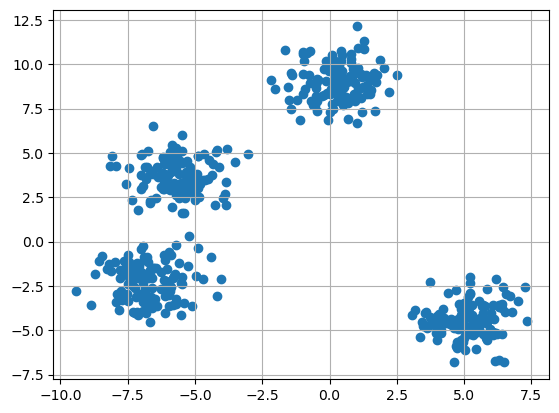

In [23]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

# K-means (step by step)

### Initialize the random centroids

In [29]:
k = 4

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    clusters[idx] = cluster
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []},
 3: {'center': array([-1.33144319, -0.43023013]), 'points': []}}

### Plot the random initialize center with data points

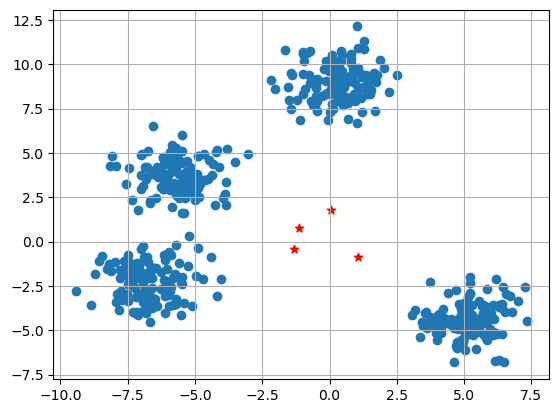

In [31]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

### Define euclidean distance

In [33]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

### Create the function to Assign and Update the cluster center

In [35]:
#Implementing E step 
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            clusters[i]['points'] = []
    return clusters

### Create the function to Predict the cluster for the datapoints

In [38]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

### Assign, Update, and predict the cluster center

In [41]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

### Plot the data points with their predicted cluster center

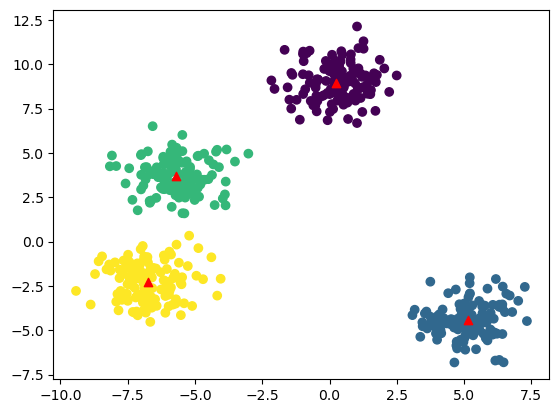

In [44]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

# K-means using Scikit learn

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [48]:
X, y = load_iris(return_X_y=True)

In [50]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

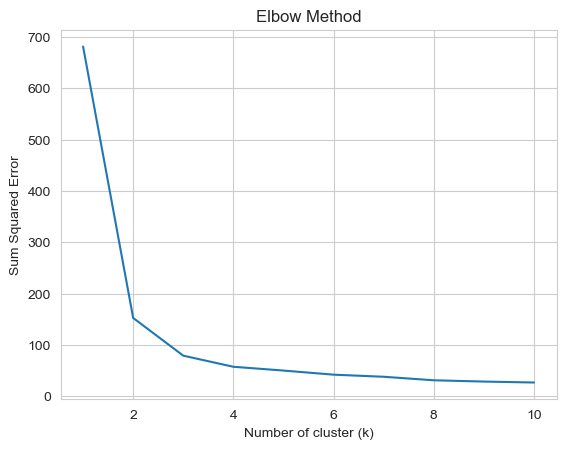

In [52]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)", 
    ylabel = "Sum Squared Error", 
    title ='Elbow Method')

plt.show()

In [54]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

In [56]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [58]:
pred = kmeans.fit_predict(X)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


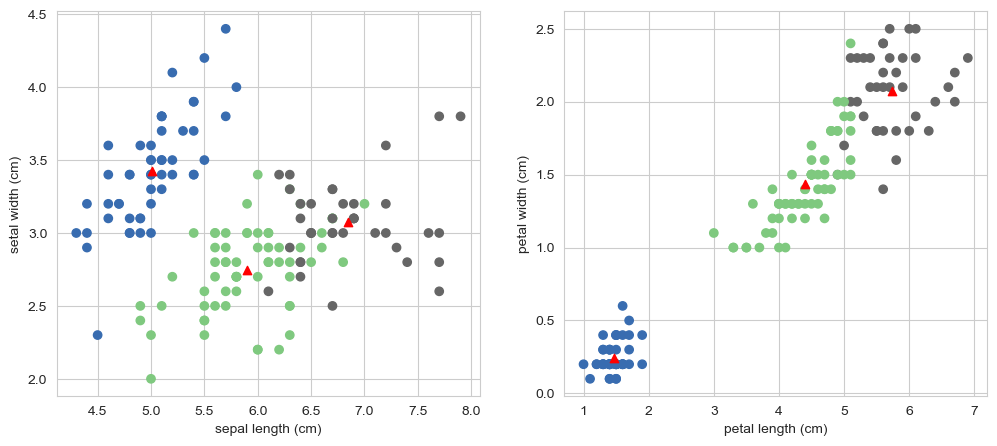

In [60]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("setal width (cm)")

plt.subplot(1,2,2) 
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

# GMM

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture

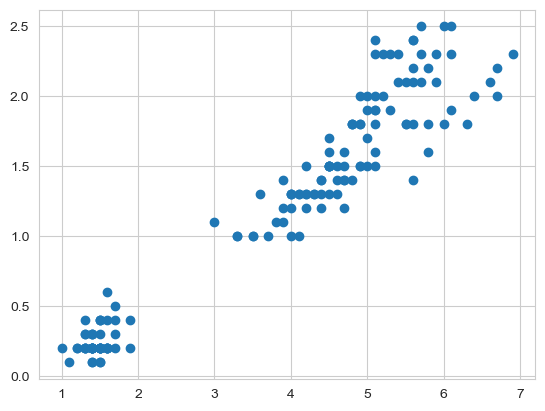

In [64]:
# load the iris dataset
iris = datasets.load_iris()

# select first two columns 
X = iris.data[:, 2:4]

# turn it into a dataframe
d = pd.DataFrame(X)

# plot the data
plt.scatter(d[0], d[1])
plt.show()

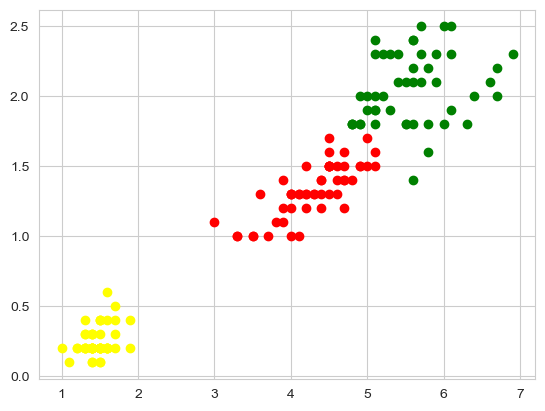

In [66]:
gmm = GaussianMixture(n_components = 3)

# Fit the GMM model for the dataset 
# which expresses the dataset as a 
# mixture of 3 Gaussian Distribution
gmm.fit(d)

# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()